# Exercise 3 - Group 4
- Matthias Egli
- Florian Bär
- Manuel Vogel
- Adrian Willi

In [1]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

OK: TensorFlow >= 2.0.0.


In [2]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import GridSearchCV

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation, Dropout
from tensorflow.keras import utils
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import confusion_matrix

%matplotlib inline

## Loading the raw data

170508288/170498071 [==============================] - 2s 0us/step


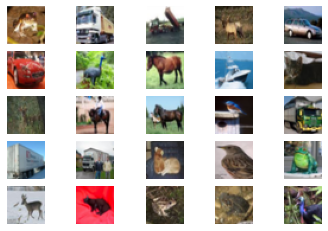

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    # show the plot
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

show_imgs(X_train)

In [4]:
# check shape and type
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)

(50000, 32, 32, 3)
uint8
(50000, 1)


In [5]:
# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [6]:
# number of classes
n_classes = 10

# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Simple CNN
### Define network

In [7]:
E = 30
B = 128
D = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
    
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


### Compile and train the network


In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 13s 11ms/step - loss: 1.6073 - accuracy: 0.4401 - val_loss: 1.3721 - val_accuracy: 0.5266
Epoch 2/30
391/391 [==============================] - 4s 9ms/step - loss: 1.2900 - accuracy: 0.5543 - val_loss: 1.2453 - val_accuracy: 0.5636
Epoch 3/30
391/391 [==============================] - 4s 9ms/step - loss: 1.1909 - accuracy: 0.5900 - val_loss: 1.2093 - val_accuracy: 0.5831
Epoch 4/30
391/391 [==============================] - 5s 12ms/step - loss: 1.1271 - accuracy: 0.6139 - val_loss: 1.1478 - val_accuracy: 0.5965
Epoch 5/30
391/391 [==============================] - 4s 11ms/step - loss: 1.0751 - accuracy: 0.6322 - val_loss: 1.1251 - val_accuracy: 0.6114
Epoch 6/30
391/391 [==============================] - 3s 9ms/step - loss: 1.0321 - accuracy: 0.6462 - val_loss: 1.0953 - val_accuracy: 0.6208
Epoch 7/30
391/391 [==============================] - 3s 9ms/step - loss: 0.9970 - accuracy: 0.6573 - val_loss: 1.0784 - val_accuracy: 0.6275
Ep

### Evaluate the network

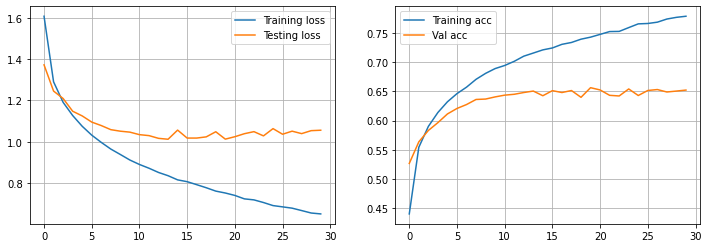

In [9]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

### Overall accuracy 

In [10]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.6072	 accuracy: 0.7959
TEST: 	 loss: 1.0559	 accuracy: 0.6523


## Deeper CNN

In [11]:
E = 30
B = 128
D = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
    
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                      

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 7s 15ms/step - loss: 1.4519 - accuracy: 0.5149 - val_loss: 1.5243 - val_accuracy: 0.4504
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 1.0565 - accuracy: 0.6409 - val_loss: 1.1941 - val_accuracy: 0.5904
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 0.9194 - accuracy: 0.6868 - val_loss: 1.1508 - val_accuracy: 0.6245
Epoch 4/30
391/391 [==============================] - 5s 14ms/step - loss: 0.8396 - accuracy: 0.7112 - val_loss: 0.9908 - val_accuracy: 0.6739
Epoch 5/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7705 - accuracy: 0.7360 - val_loss: 1.5142 - val_accuracy: 0.5639
Epoch 6/30
391/391 [==============================] - 5s 14ms/step - loss: 0.7242 - accuracy: 0.7480 - val_loss: 1.1568 - val_accuracy: 0.6321
Epoch 7/30
391/391 [==============================] - 5s 14ms/step - loss: 0.6729 - accuracy: 0.7670 - val_loss: 1.0263 - val_accuracy: 0.6660

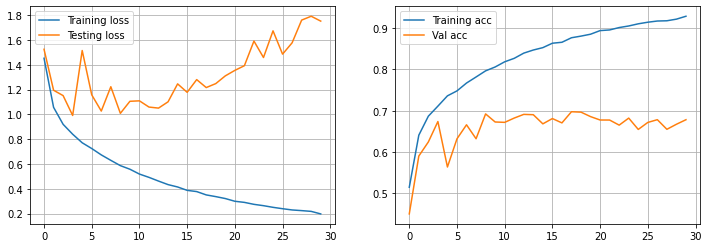

In [13]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

In [14]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.2888	 accuracy: 0.8944
TEST: 	 loss: 1.7512	 accuracy: 0.6783


In [15]:
E = 30
B = 128
D = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 64)       256       
 hNormalization)                                                 
                                                      

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 8s 18ms/step - loss: 2.2059 - accuracy: 0.5489 - val_loss: 2.8353 - val_accuracy: 0.2055
Epoch 2/30
391/391 [==============================] - 7s 17ms/step - loss: 1.3614 - accuracy: 0.6742 - val_loss: 1.3425 - val_accuracy: 0.6437
Epoch 3/30
391/391 [==============================] - 7s 17ms/step - loss: 1.1455 - accuracy: 0.7096 - val_loss: 1.5446 - val_accuracy: 0.5998
Epoch 4/30
391/391 [==============================] - 7s 17ms/step - loss: 1.0505 - accuracy: 0.7374 - val_loss: 1.4772 - val_accuracy: 0.6144
Epoch 5/30
391/391 [==============================] - 7s 17ms/step - loss: 0.9957 - accuracy: 0.7542 - val_loss: 1.2023 - val_accuracy: 0.6932
Epoch 6/30
391/391 [==============================] - 7s 17ms/step - loss: 0.9632 - accuracy: 0.7650 - val_loss: 1.3689 - val_accuracy: 0.6471
Epoch 7/30
391/391 [==============================] - 7s 18ms/step - loss: 0.9362 - accuracy: 0.7772 - val_loss: 1.2846 - val_accuracy: 0.6726

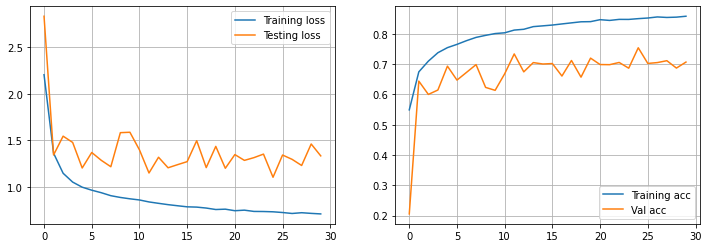

In [17]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

In [18]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.8769	 accuracy: 0.8038
TEST: 	 loss: 1.3327	 accuracy: 0.7066


In [19]:
E = 30
B = 128
D = X_train.shape[1:]

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), input_shape=D, strides=2, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(Conv2D(128, kernel_size=(3,3), input_shape=D, strides=1, padding='same', activation='relu', kernel_regularizer='l2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Conv2D(128, kernel_size=(3,3), input_shape=D, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(n_classes, activation='softmax'))
    
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 batch_normalization_6 (Batc  (None, 8, 8, 64)        

In [20]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/30
391/391 [==============================] - 9s 20ms/step - loss: 2.2373 - accuracy: 0.5290 - val_loss: 3.1239 - val_accuracy: 0.1786
Epoch 2/30
391/391 [==============================] - 8s 19ms/step - loss: 1.3429 - accuracy: 0.6635 - val_loss: 1.5404 - val_accuracy: 0.5615
Epoch 3/30
391/391 [==============================] - 8s 20ms/step - loss: 1.1092 - accuracy: 0.7096 - val_loss: 1.2099 - val_accuracy: 0.6742
Epoch 4/30
391/391 [==============================] - 7s 19ms/step - loss: 0.9999 - accuracy: 0.7412 - val_loss: 1.3322 - val_accuracy: 0.6277
Epoch 5/30
391/391 [==============================] - 7s 19ms/step - loss: 0.9386 - accuracy: 0.7632 - val_loss: 1.1567 - val_accuracy: 0.6934
Epoch 6/30
391/391 [==============================] - 7s 19ms/step - loss: 0.8942 - accuracy: 0.7758 - val_loss: 1.3046 - val_accuracy: 0.6740
Epoch 7/30
391/391 [==============================] - 8s 19ms/step - loss: 0.8618 - accuracy: 0.7891 - val_loss: 1.0985 - val_accuracy: 0.7155

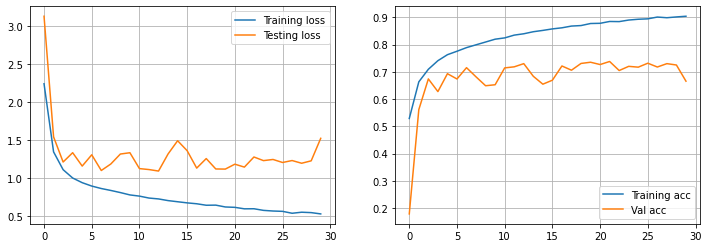

In [21]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

In [22]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.9109	 accuracy: 0.7962
TEST: 	 loss: 1.5210	 accuracy: 0.6659


In [23]:
E = 100
B = 128
D = X_train.shape[1:]
## reference implementation from https://gist.github.com/josefelixsandoval/fad43016c9bca96ea529a2ff4340eba3 to have a comparison
model = Sequential()
# Add layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
    
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                 

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100
391/391 [==============================] - 12s 29ms/step - loss: 1.6419 - accuracy: 0.3878 - val_loss: 1.2784 - val_accuracy: 0.5285
Epoch 2/100
391/391 [==============================] - 11s 27ms/step - loss: 1.1835 - accuracy: 0.5748 - val_loss: 0.9751 - val_accuracy: 0.6524
Epoch 3/100
391/391 [==============================] - 11s 27ms/step - loss: 0.9939 - accuracy: 0.6479 - val_loss: 0.8433 - val_accuracy: 0.7057
Epoch 4/100
391/391 [==============================] - 10s 26ms/step - loss: 0.8713 - accuracy: 0.6927 - val_loss: 0.7935 - val_accuracy: 0.7193
Epoch 5/100
391/391 [==============================] - 11s 27ms/step - loss: 0.8015 - accuracy: 0.7174 - val_loss: 0.7491 - val_accuracy: 0.7400
Epoch 6/100
391/391 [==============================] - 11s 27ms/step - loss: 0.7438 - accuracy: 0.7395 - val_loss: 0.7005 - val_accuracy: 0.7573
Epoch 7/100
391/391 [==============================] - 11s 27ms/step - loss: 0.6959 - accuracy: 0.7561 - val_loss: 0.6910 - val_ac

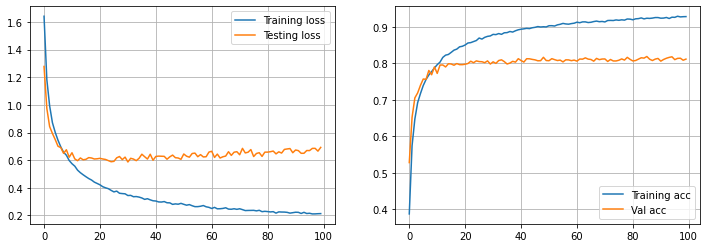

In [25]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

In [26]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.0398	 accuracy: 0.9947
TEST: 	 loss: 0.6924	 accuracy: 0.8119


In [27]:
E = 50
B = 128
D = X_train.shape[1:]
## reference implementation from https://gist.github.com/josefelixsandoval/fad43016c9bca96ea529a2ff4340eba3 to have a comparison
model = Sequential()
# Add layers
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))
model.add(BatchNormalization())

# Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.25))

# Layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(n_classes, activation='softmax'))
    
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_16 (Conv2D)          (None, 12, 12, 128)      

In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
              metrics=['accuracy'])
log = model.fit(X_train, Y_train, batch_size=B, epochs=E,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/50
391/391 [==============================] - 12s 30ms/step - loss: 1.5836 - accuracy: 0.4284 - val_loss: 7.0195 - val_accuracy: 0.1000
Epoch 2/50
391/391 [==============================] - 11s 27ms/step - loss: 1.1481 - accuracy: 0.5914 - val_loss: 1.0528 - val_accuracy: 0.6204
Epoch 3/50
391/391 [==============================] - 11s 27ms/step - loss: 0.9475 - accuracy: 0.6655 - val_loss: 0.8665 - val_accuracy: 0.6913
Epoch 4/50
391/391 [==============================] - 11s 27ms/step - loss: 0.8332 - accuracy: 0.7073 - val_loss: 0.8669 - val_accuracy: 0.7029
Epoch 5/50
391/391 [==============================] - 11s 27ms/step - loss: 0.7607 - accuracy: 0.7341 - val_loss: 0.7534 - val_accuracy: 0.7388
Epoch 6/50
391/391 [==============================] - 11s 27ms/step - loss: 0.7007 - accuracy: 0.7561 - val_loss: 0.7197 - val_accuracy: 0.7510
Epoch 7/50
391/391 [==============================] - 11s 27ms/step - loss: 0.6606 - accuracy: 0.7699 - val_loss: 0.6675 - val_accuracy:

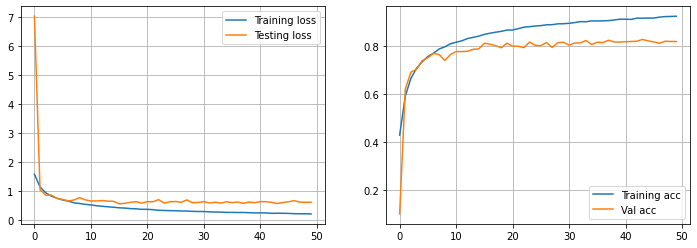

In [29]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Val acc')
ax2.legend()
ax2.grid()

In [30]:
loss_train, metric_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('TRAIN: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_train, metric_train))
print('TEST: \t loss: {0:.4f}\t accuracy: {1:.4f}'.format(loss_test, metric_test))

TRAIN: 	 loss: 0.0650	 accuracy: 0.9849
TEST: 	 loss: 0.6234	 accuracy: 0.8187


| Id    | Architecture                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           | Train Acc     | Test Acc      |
|-------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------|---------------|
|     1 | Conv2D(32, kernel_size=(3,3),   input_shape=D, strides=1, padding='same', activation='relu')      MaxPooling2D(2)      Flatten()      Dense(n_classes, activation='softmax')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |     0.7959    |     0.6523    |
| 2     | Conv2D(32, kernel_size=(3,3),   input_shape=D, strides=1, padding='same', activation='relu')      BatchNormalization()      MaxPooling2D(2)      Conv2D(64, kernel_size=(3,3), input_shape=D, strides=1, padding='same',   activation='relu')      BatchNormalization()      MaxPooling2D(2)      Flatten()      Dense(n_classes, activation='softmax')                                                                                                                                                                                                                                                                                                                                                                                                                                                |     0.8944    |     0.6783    |
| 3     | Conv2D(32, kernel_size=(3,3),   input_shape=D, strides=1, padding='same', activation='relu',   kernel_regularizer='l2')      BatchNormalization()      MaxPooling2D(2)      Conv2D(64, kernel_size=(3,3), input_shape=D, strides=1, padding='same',   activation='relu', kernel_regularizer='l2')      BatchNormalization()      MaxPooling2D(2)      Conv2D(128, kernel_size=(3,3), input_shape=D, strides=1, padding='same',   activation='relu', kernel_regularizer='l2')      BatchNormalization()      MaxPooling2D(2)      Flatten()                                                                                                                                                                                                                                                             | 0.8038        | 0.7066        |
| 4     | Conv2D(32, kernel_size=(3,3),   input_shape=D, strides=1, padding='same', activation='relu',   kernel_regularizer='l2')      tf.keras.layers.Dropout(0.25)      BatchNormalization()      MaxPooling2D(2)      Conv2D(64, kernel_size=(3,3), input_shape=D, strides=2, padding='same',   activation='relu', kernel_regularizer='l2')      BatchNormalization()      Conv2D(128, kernel_size=(3,3), input_shape=D, strides=1, padding='same',   activation='relu', kernel_regularizer='l2')      BatchNormalization()      MaxPooling2D(2)      Conv2D(128, kernel_size=(3,3), input_shape=D, strides=2, padding='same',   activation='relu')      BatchNormalization()      MaxPooling2D(2)      Flatten()      Dense(n_classes, activation='softmax')                                                 | 0.7962        | 0.6659        |
| 5     | tf.keras.layers.Conv2D(32,   kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')      tf.keras.layers.MaxPooling2D(pool_size=(2, 2))      tf.keras.layers.Dropout(0.25)                  tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')      tf.keras.layers.MaxPooling2D(pool_size=(2, 2))      tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')      tf.keras.layers.MaxPooling2D(pool_size=(2, 2))      tf.keras.layers.Dropout(0.25)                  tf.keras.layers.Flatten()      tf.keras.layers.Dense(1024, activation='relu')      tf.keras.layers.Dropout(0.5)      tf.keras.layers.Dense(n_classes, activation='softmax')                                         | 0.9947        | 0.8119        |
| 6     | tf.keras.layers.Conv2D(32,   kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))      tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')      tf.keras.layers.MaxPooling2D(pool_size=(2, 2))      tf.keras.layers.Dropout(0.25)      BatchNormalization()            tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')      tf.keras.layers.MaxPooling2D(pool_size=(2, 2))      BatchNormalization()      tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')      tf.keras.layers.MaxPooling2D(pool_size=(2, 2))      tf.keras.layers.Dropout(0.25)            tf.keras.layers.Flatten()      tf.keras.layers.Dense(1024, activation='relu')      tf.keras.layers.Dropout(0.5)      tf.keras.layers.Dense(n_classes, activation='softmax') | 0.9849        | 0.8187        |